# Testing the Candidate Resolver Model

Here the candidate resolver is tested with and without metric learning. At the end there are plots plotting the resolver output probability against given distances.

## Import embedder

In [1]:
from src.candidate_resolver.embedding.BertEmbedder import BertEmbedder

2022-08-22 20:22:11.170849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-22 20:22:11.170877: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Initialize embedder

In [2]:
embedder = BertEmbedder.initialize("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", "https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/4")

2022-08-22 20:22:14.636713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-22 20:22:14.636745: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-22 20:22:14.636771: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (WorkPad): /proc/driver/nvidia/version does not exist
2022-08-22 20:22:14.637056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading the data

In [3]:
from src.util.Storage import Storage

In [4]:
dataframe = Storage().load_candidate_resolver_dataset()

## Test Candidate Resolver models.

In [5]:
from pathlib import Path
from src.candidate_resolver import training
from src.candidate_resolver.configurables.resolver_configurable_enums import EmbeddingType

from src.candidate_resolver.embedding.embedder_functions import EmbeddingFunctionProvider

### Without self attention

In [6]:
embedding_function_provider = EmbeddingFunctionProvider(embedder)

In [7]:
sequence_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/sequence_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.SEQUENCE),
    regressor_num_epochs=1,
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 55.7777 - binary_crossentropy: 55.7777
INFO:tensorflow:Assets written to: ../../res/trained/sequence_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/sequence_model/regressor/assets


In [8]:
sequence_model_pos = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/sequence_model_pos"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.SEQUENCE_POSITIONAL),
    regressor_num_epochs=1,
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 1s 2ms/step - loss: 0.2956 - binary_crossentropy: 0.2956
INFO:tensorflow:Assets written to: ../../res/trained/sequence_model_pos/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/sequence_model_pos/regressor/assets


In [9]:
bert_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/bert_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.BERT_POOLED),
    regressor_num_epochs=1,
    regressor_learning_rate=1
)

72/72 [==============================] - 0s 2ms/step - loss: 0.6363 - binary_crossentropy: 0.6363
INFO:tensorflow:Assets written to: ../../res/trained/bert_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/bert_pooled_model/regressor/assets


In [10]:
max_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/max_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.MAX_POOLED),
    regressor_num_epochs=1,
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 2.2973 - binary_crossentropy: 2.2973
INFO:tensorflow:Assets written to: ../../res/trained/max_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/max_pooled_model/regressor/assets


In [11]:
avg_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/avg_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.AVG_POOLED),
    regressor_num_epochs=1,
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 4.7003 - binary_crossentropy: 4.7003
INFO:tensorflow:Assets written to: ../../res/trained/avg_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/avg_pooled_model/regressor/assets


In [12]:
max_pooled_model_pos = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/max_pooled_model_pos"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.MAX_POOLED_POSITIONAL),
    regressor_num_epochs=1,
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 3.8063 - binary_crossentropy: 3.8063
INFO:tensorflow:Assets written to: ../../res/trained/max_pooled_model_pos/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/max_pooled_model_pos/regressor/assets


In [13]:
avg_pooled_model_pos = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/avg_pooled_model_pos"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.AVG_POOLED_POSITIONAL),
    regressor_num_epochs=1,
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 4.4910 - binary_crossentropy: 4.4910
INFO:tensorflow:Assets written to: ../../res/trained/avg_pooled_model_pos/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/avg_pooled_model_pos/regressor/assets


# Combining the Regressor with Metric learning approach

In [14]:
from metric_learn import NCA, LMNN

In [15]:
nca_bert_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/nca_bert_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.BERT_POOLED),
    metric_learner=NCA(max_iter=1000),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 0.2864 - binary_crossentropy: 0.2864
INFO:tensorflow:Assets written to: ../../res/trained/nca_bert_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/nca_bert_pooled_model/regressor/assets


In [16]:
nca_max_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/nca_max_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.MAX_POOLED),
    metric_learner=NCA(max_iter=1000),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 0.2073 - binary_crossentropy: 0.2073
INFO:tensorflow:Assets written to: ../../res/trained/nca_max_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/nca_max_pooled_model/regressor/assets


In [17]:
nca_avg_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/nca_avg_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.AVG_POOLED),
    metric_learner=NCA(max_iter=1000),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 0.4033 - binary_crossentropy: 0.4033
INFO:tensorflow:Assets written to: ../../res/trained/nca_avg_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/nca_avg_pooled_model/regressor/assets


In [18]:
nca_max_pooled_pos_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/nca_max_pooled_pos_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.MAX_POOLED_POSITIONAL),
    metric_learner=NCA(max_iter=1000),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 0.3178 - binary_crossentropy: 0.3178
INFO:tensorflow:Assets written to: ../../res/trained/nca_max_pooled_pos_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/nca_max_pooled_pos_model/regressor/assets


In [19]:
nca_avg_pooled_pos_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/nca_avg_pooled_pos_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.AVG_POOLED_POSITIONAL),
    metric_learner=NCA(max_iter=1000),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 188.7127 - binary_crossentropy: 188.7127
INFO:tensorflow:Assets written to: ../../res/trained/nca_avg_pooled_pos_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/nca_avg_pooled_pos_model/regressor/assets


In [20]:
lmnn_bert_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/lmnn_bert_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.BERT_POOLED),
    metric_learner=LMNN(k=1, learn_rate=1e-3),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 7.4987 - binary_crossentropy: 7.4987
INFO:tensorflow:Assets written to: ../../res/trained/lmnn_bert_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/lmnn_bert_pooled_model/regressor/assets


In [21]:
lmnn_max_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/lmnn_max_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.MAX_POOLED),
    metric_learner=LMNN(k=1, learn_rate=1e-3),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 2.6212 - binary_crossentropy: 2.6212
INFO:tensorflow:Assets written to: ../../res/trained/lmnn_max_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/lmnn_max_pooled_model/regressor/assets


In [22]:
lmnn_avg_pooled_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/lmnn_avg_pooled_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.AVG_POOLED),
    metric_learner=LMNN(k=1, learn_rate=1e-3),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 1ms/step - loss: 4.4224 - binary_crossentropy: 4.4224
INFO:tensorflow:Assets written to: ../../res/trained/lmnn_avg_pooled_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/lmnn_avg_pooled_model/regressor/assets


In [23]:
lmnn_max_pooled_pos_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/lmnn_max_pooled_pos_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.MAX_POOLED_POSITIONAL),
    metric_learner=LMNN(k=1, learn_rate=1e-3),
    regressor_learning_rate=1e-3
)

72/72 [==============================] - 0s 2ms/step - loss: 6.1756 - binary_crossentropy: 6.1756
INFO:tensorflow:Assets written to: ../../trained/lmnn_max_pooled_pos_model/regressor/assets


INFO:tensorflow:Assets written to: ../../trained/lmnn_max_pooled_pos_model/regressor/assets


In [24]:
lmnn_avg_pooled_pos_model = training.create_and_train_model(
    dataframe,
    "Lifted instance", "DSL output",
    Path("../../res/trained/lmnn_max_pooled_pos_model"),
    embedding_function_provider
    .select_embedding_function(EmbeddingType.AVG_POOLED_POSITIONAL),
    metric_learner=LMNN(k=1, learn_rate=1e-3),
    regressor_learning_rate=1e-3
)


72/72 [==============================] - 0s 2ms/step - loss: 2.4041 - binary_crossentropy: 2.4041
INFO:tensorflow:Assets written to: ../../res/trained/lmnn_max_pooled_pos_model/regressor/assets


INFO:tensorflow:Assets written to: ../../res/trained/lmnn_max_pooled_pos_model/regressor/assets


In [25]:
print(lmnn_max_pooled_pos_model.call("Select [,column] [table]"))

([<tf.Tensor: shape=(), dtype=float32, numpy=0.9928116>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9928117>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9928117>, <tf.Tensor: shape=(), dtype=float32, numpy=0.99457747>, <tf.Tensor: shape=(), dtype=float32, numpy=0.99524623>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9956509>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9956509>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9956509>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9974403>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9974403>, <tf.Tensor: shape=(), dtype=float32, numpy=0.997489>, <tf.Tensor: shape=(), dtype=float32, numpy=0.997489>, <tf.Tensor: shape=(), dtype=float32, numpy=0.997489>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9975109>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9975356>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9975877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9975877>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9975877>, <tf.Tenso

## Show logistic regressor output as a function of score

In [26]:
from src.plotting.plots import plot_function_of_candidate_resolver_models_by_distance

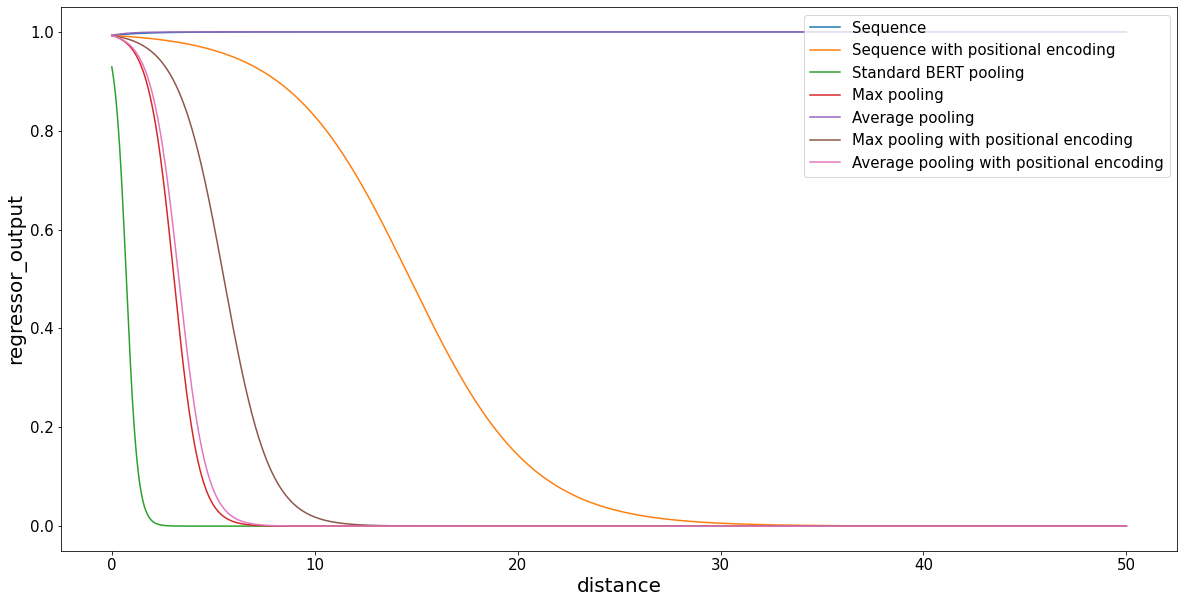

In [27]:
plot_function_of_candidate_resolver_models_by_distance(
    "regressor_functions_no_metric_learn",
    [
        sequence_model,
        sequence_model_pos,
        bert_pooled_model,
        max_pooled_model,
        avg_pooled_model,
        max_pooled_model_pos,
        avg_pooled_model_pos,
    ], [
        "Sequence",
        "Sequence with positional encoding",
        "Standard BERT pooling",
        "Max pooling",
        "Average pooling",
        "Max pooling with positional encoding",
        "Average pooling with positional encoding",
    ]
)

## Plot performance of metric learning enhanced Models

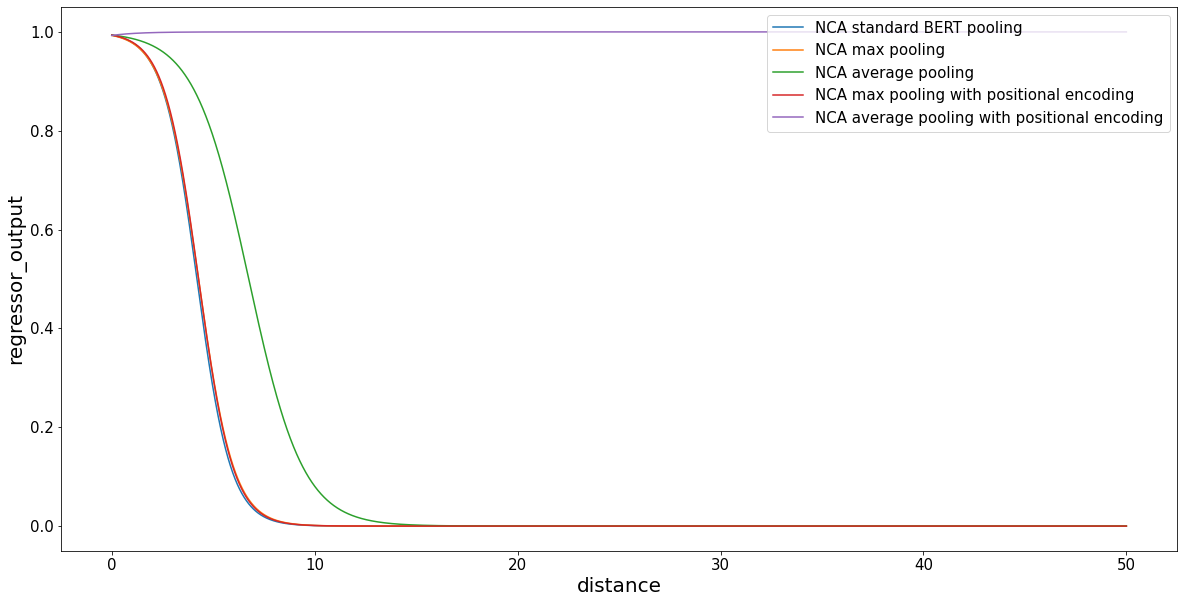

In [28]:
plot_function_of_candidate_resolver_models_by_distance(
    "regressor_functions_nca",
    [
        nca_bert_pooled_model,
        nca_max_pooled_model,
        nca_avg_pooled_model,
        nca_max_pooled_pos_model,
        nca_avg_pooled_pos_model
    ], [
        "NCA standard BERT pooling",
        "NCA max pooling",
        "NCA average pooling",
        "NCA max pooling with positional encoding",
        "NCA average pooling with positional encoding"
    ]
)

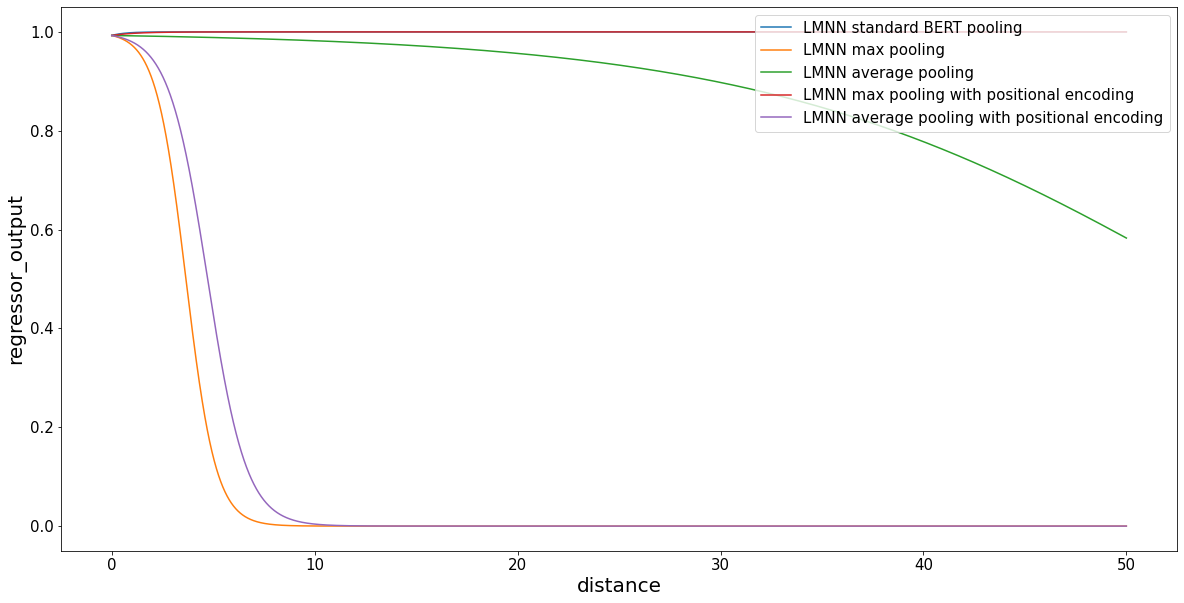

In [29]:
plot_function_of_candidate_resolver_models_by_distance(
    "regressor_functions_lmnn",
    [
        lmnn_bert_pooled_model,
        lmnn_max_pooled_model,
        lmnn_avg_pooled_model,
        lmnn_max_pooled_pos_model,
        lmnn_avg_pooled_pos_model
    ], [
        "LMNN standard BERT pooling",
        "LMNN max pooling",
        "LMNN average pooling",
        "LMNN max pooling with positional encoding",
        "LMNN average pooling with positional encoding"
    ]
)

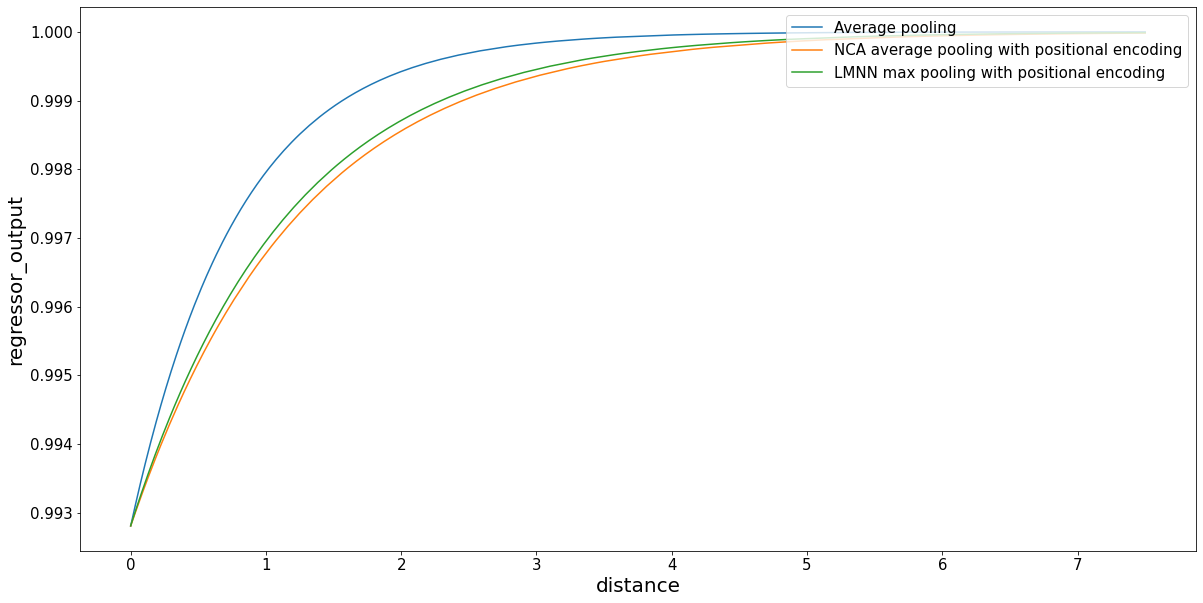

In [35]:
plot_function_of_candidate_resolver_models_by_distance(
    "falsely_learned_logistic_functions",
    [
        avg_pooled_model,
        nca_avg_pooled_pos_model,
        lmnn_max_pooled_pos_model,
    ],
    [
        "Average pooling",
        "NCA average pooling with positional encoding",
        "LMNN max pooling with positional encoding"
    ],
    max_distance=7.5
)